# ML Bootcamp

https://mlbootcamp.ru/ru/article/tutorial/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',
                  header = None,
                  na_values="?")

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


Дадим столбцам более удобные имена:

In [5]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [6]:
data.columns = ["A"+ str(i) for i in range(1, 16)] + ["class"]
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


<p style="color:red"> Разное количество значений в столбцах => есть пропущенные данные </p>

### рассмотрим диаграммы рассеяния и корреляции между переменными

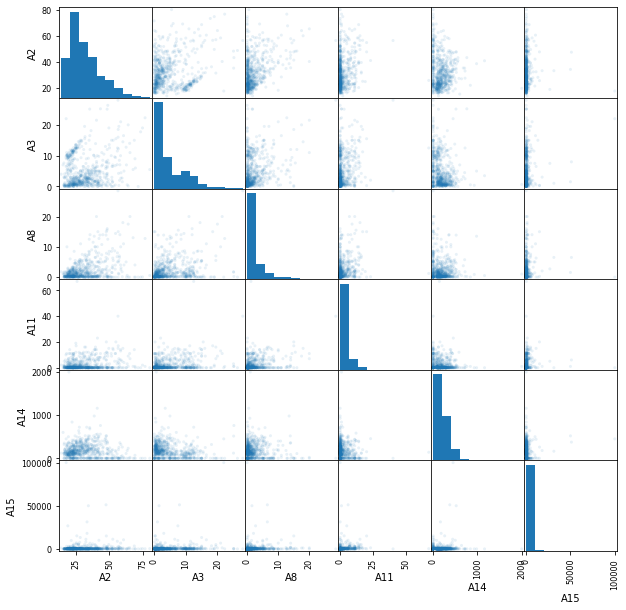

In [8]:
pd.plotting.scatter_matrix(data, alpha = 0.1, figsize = (10,10));

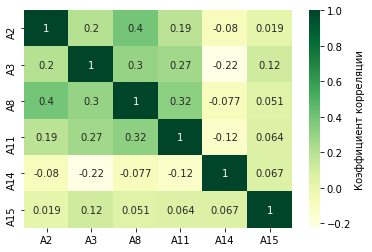

In [9]:
sns.heatmap(data.corr(), cmap='YlGn', annot =True, cbar_kws={'label':'Коэффициент корреляции'})
plt.show()

## Подготовка данных

<b> <i> Нам нужно сделать так, чтобы в данных не было пропущенных значений, для этого существует два метода: </b> </i>
* удаление строк, содержащих na значение: 
```python
data = data.dropna(axis=1)
```

* удаление столбцов, содержащих na значение:
```python
data = data.dropna(axis=0)
```

<p style="color:red"> Но так мы можем сильно уменьшить количество данных! </p>
<b> <i> Второй метод: </b> </i>

- заполнение пропущенных числовых данных медианным значением:

```python
data = data.fillna(data.median(axis=0), axis=0)
```
- заполнение пропущенных нечисловых данных медианным значением:

узнаем самое популярное значение в столбце А1: 
```python
data['A1'].describe()
```
заполняем:
```python
data['A1'] = data['A1'].fillna('b')
```

<p style="color:green"> <b> Воспользуемся вторым методом <b> </p>

In [10]:
# заполнение всех пропусков по столбцам с числовыми значениями медианами в этих столбцах:
data = data.fillna(data.median(axis=0), axis=0)

# поиск стобцов, где значения не числовые:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

# заполнение всех пропусков в стобцах, где значения не числа:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


<b> Определим бинарные (принимают только два значения) и небинарные признаки для нечисловых столбцов: </b>

In [13]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']


<b> Заменим все значения бинарных на 0 и 1: </b>

In [14]:
for c in binary_columns[:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [15]:
data[binary_columns].describe()

,A1,A9,A10,A12,class
count,690,690,690,690,690
unique,2,2,2,2,2
top,0,0,0,0,0
freq,480,361,395,374,383
